In [44]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE

In [3]:
DATASET_DIR = "../dataset/regression/traffic"
SAVE_NAME = "traffic_ori.csv"

In [11]:
df = pd.read_csv(f"{DATASET_DIR}/{SAVE_NAME}", parse_dates=["date_time"])
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [12]:
df.dtypes

holiday                        object
temp                          float64
rain_1h                       float64
snow_1h                       float64
clouds_all                      int64
weather_main                   object
weather_description            object
date_time              datetime64[ns]
traffic_volume                  int64
dtype: object

In [8]:
y_feature = "traffic_volume"

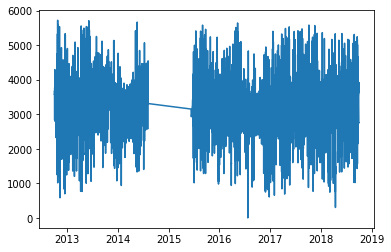

In [17]:
plt.plot(df["date_time"],df[y_feature].rolling(window=24).mean())

In [33]:
df["year"] = df["date_time"].dt.year
df.groupby("year")[y_feature].agg(["count", "mean", "median", "std"])

,count,mean,median,std
year,,,,
2012,2559,3207.802657,3225.0,1990.621400
2013,8573,3286.762160,3344.0,2028.322769
2014,4839,3250.938004,3316.0,1998.997206
2015,4373,3242.900983,3368.0,1990.121589
2016,9306,3169.441328,3258.5,1947.408772
2017,10605,3340.703065,3530.0,1986.506660
2018,7949,3260.112341,3400.0,1973.092051


In [34]:
df["month"] = df["date_time"].dt.month
df.groupby("month")[y_feature].agg(["count", "mean", "median", "std"])

,count,mean,median,std
month,,,,
1,4006,3051.081378,3089.5,1908.005271
2,3526,3197.945547,3306.0,1975.132896
3,3793,3308.388611,3510.0,2027.307440
4,4259,3304.372388,3340.0,2069.506951
5,4436,3366.319432,3463.0,2032.456639
6,3772,3419.077413,3652.5,1974.981779
7,4795,3205.481752,3268.0,1940.092540
8,4378,3394.241891,3648.5,1988.363974
9,3831,3303.049334,3477.0,1997.358580


In [35]:
df["hour"] = df["date_time"].dt.hour
df.groupby("hour")[y_feature].agg(["count", "mean", "median", "std"])

,count,mean,median,std
hour,,,,
0,2037,834.781051,676.0,380.958191
1,2049,516.449000,420.0,227.104609
2,2019,388.353640,315.0,168.196955
3,2025,371.090864,362.0,67.188107
4,2091,702.551889,807.0,233.880132
5,2063,2094.573437,2638.0,1008.377374
6,2087,4140.503594,5381.0,2073.217328
7,2079,4740.181337,5998.0,2215.390808
8,2080,4587.497115,5440.5,1669.276403


In [46]:
df[df["date_time"].dt.date==datetime.date(2014,1,1)]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,year,month,hour
11132,New Years Day,250.140,0.0,0.0,90,Clouds,overcast clouds,2014-01-01 00:00:00,1395,2014,1,0
11133,None,250.390,0.0,0.0,75,Clouds,broken clouds,2014-01-01 01:00:00,1292,2014,1,1
11134,None,250.390,0.0,0.0,90,Clouds,overcast clouds,2014-01-01 02:00:00,957,2014,1,2
11135,None,250.890,0.0,0.0,90,Clouds,overcast clouds,2014-01-01 03:00:00,559,2014,1,3
11136,None,250.890,0.0,0.0,90,Clouds,overcast clouds,2014-01-01 04:00:00,329,2014,1,4
11137,None,251.150,0.0,0.0,90,Clouds,overcast clouds,2014-01-01 05:00:00,435,2014,1,5
11138,None,251.150,0.0,0.0,90,Clouds,overcast clouds,2014-01-01 06:00:00,606,2014,1,6
11139,None,251.150,0.0,0.0,90,Clouds,overcast clouds,2014-01-01 07:00:00,772,2014,1,7
11140,None,251.640,0.0,0.0,90,Clouds,overcast clouds,2014-01-01 08:00:00,993,2014,1,8
11141,None,251.800,0.0,0.0,90,Clouds,overcast clouds,2014-01-01 09:00:00,1258,2014,1,9


0時にしかholiday情報が入っていない

In [58]:
# 全ての時刻にholiday情報を入力
for key, df_one in df.groupby(df["date_time"].dt.date):
    head_holiday = df_one.iloc[0,0]
    df.loc[df_one.index, "holiday"] = head_holiday

In [59]:
df[df["date_time"].dt.date==datetime.date(2014,1,1)]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,year,month,hour
11132,New Years Day,250.140,0.0,0.0,90,Clouds,overcast clouds,2014-01-01 00:00:00,1395,2014,1,0
11133,New Years Day,250.390,0.0,0.0,75,Clouds,broken clouds,2014-01-01 01:00:00,1292,2014,1,1
11134,New Years Day,250.390,0.0,0.0,90,Clouds,overcast clouds,2014-01-01 02:00:00,957,2014,1,2
11135,New Years Day,250.890,0.0,0.0,90,Clouds,overcast clouds,2014-01-01 03:00:00,559,2014,1,3
11136,New Years Day,250.890,0.0,0.0,90,Clouds,overcast clouds,2014-01-01 04:00:00,329,2014,1,4
11137,New Years Day,251.150,0.0,0.0,90,Clouds,overcast clouds,2014-01-01 05:00:00,435,2014,1,5
11138,New Years Day,251.150,0.0,0.0,90,Clouds,overcast clouds,2014-01-01 06:00:00,606,2014,1,6
11139,New Years Day,251.150,0.0,0.0,90,Clouds,overcast clouds,2014-01-01 07:00:00,772,2014,1,7
11140,New Years Day,251.640,0.0,0.0,90,Clouds,overcast clouds,2014-01-01 08:00:00,993,2014,1,8
11141,New Years Day,251.800,0.0,0.0,90,Clouds,overcast clouds,2014-01-01 09:00:00,1258,2014,1,9


In [60]:
df.groupby("holiday")[y_feature].agg(["count", "mean", "median", "std"])

,count,mean,median,std
holiday,,,,
Christmas Day,131,1739.145038,1758.0,1090.961257
Columbus Day,112,3475.348214,4276.5,2040.305174
Independence Day,126,2177.801587,2534.0,1140.664768
Labor Day,157,2195.331210,2081.0,1410.257039
Martin Luther King Jr Day,107,2711.102804,3307.0,1610.487170
Memorial Day,134,2085.649254,2210.5,1302.320539
New Years Day,131,1924.595420,1738.0,1091.525388
None,46795,3281.448851,3435.0,1992.303593
State Fair,120,3831.500000,4756.0,2130.180700


In [32]:
df["weather_main"].value_counts()

Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

In [29]:
df["weather_description"].value_counts()

sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thundersto